In [1]:
import sqlite3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
conn_obj = connection.cursor()

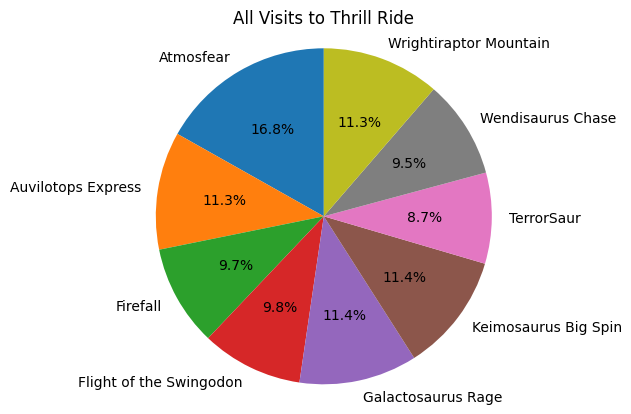

In [56]:
# Chart 1: A Pie Chart depicting visits to thrill ride attractions.

import sqlite3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)

def func(pct):
  return "{:1.1f}%".format(pct)

sql = "SELECT attraction.name as Name, count(*) as sumCheckins FROM checkin INNER JOIN attraction on attraction.AttractionID = checkin.attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%thrill rides%' GROUP BY attraction.name"

data = pd.read_sql(sql, connection)

plt.pie(data.sumCheckins, labels=data.Name, autopct=lambda pct: func(pct), shadow=False, startangle=90)
plt.title("All Visits to Thrill Ride")
plt.axis('equal')
plt.show()


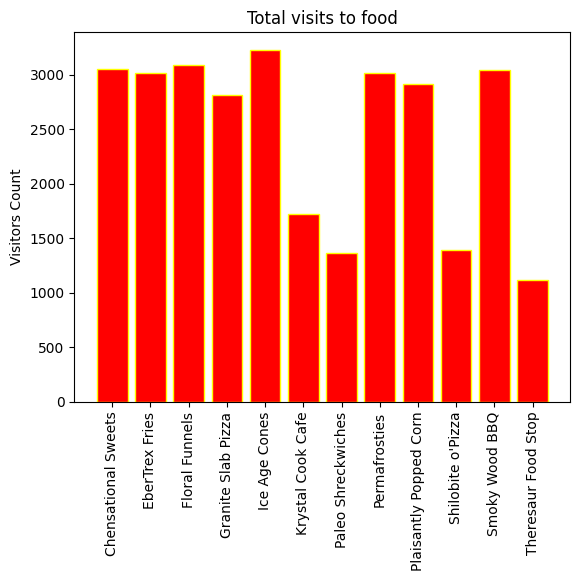

In [57]:
# Chart 2: A Bar Chart depicting total visits to food stalls.

import sqlite3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

db_name='dinofunworld.db'
connection = sqlite3.connect(db_name)
connectionCursor = connection.cursor()

## Variables
Values = []
Labels = []

sql = "SELECT attraction.name as Name, count(*) as sumCheckins FROM checkin INNER JOIN attraction on attraction.AttractionID = checkin.attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%food%' GROUP BY attraction.name"

data = pd.read_sql(sql, connection)
#x values: data.Country,  y values: data.sum_deaths

plt.bar(data.Name, data.sumCheckins ,align='center', color = 'red', edgecolor = 'yellow')
plt.xticks(rotation=90)
plt.title('Total visits to food')
plt.ylabel('Visitors Count')
plt.show()


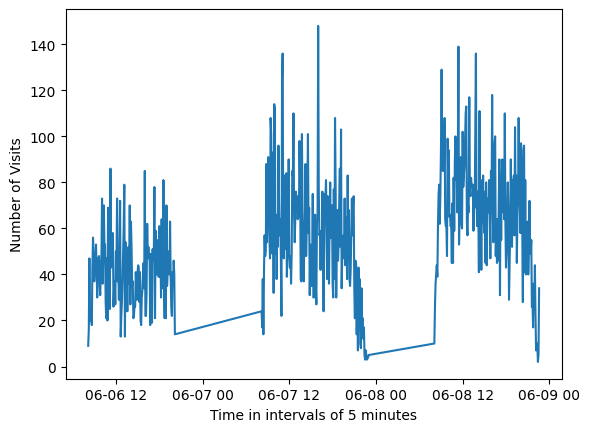

[[datetime.datetime(2014, 6, 6, 8, 10), 9], [datetime.datetime(2014, 6, 6, 8, 15), 16], [datetime.datetime(2014, 6, 6, 8, 20), 47], [datetime.datetime(2014, 6, 6, 8, 25), 20], [datetime.datetime(2014, 6, 6, 8, 30), 21], [datetime.datetime(2014, 6, 6, 8, 35), 22], [datetime.datetime(2014, 6, 6, 8, 40), 18], [datetime.datetime(2014, 6, 6, 8, 45), 43], [datetime.datetime(2014, 6, 6, 8, 50), 56], [datetime.datetime(2014, 6, 6, 8, 55), 50], [datetime.datetime(2014, 6, 6, 9, 0), 37], [datetime.datetime(2014, 6, 6, 9, 5), 43], [datetime.datetime(2014, 6, 6, 9, 10), 45], [datetime.datetime(2014, 6, 6, 9, 15), 53], [datetime.datetime(2014, 6, 6, 9, 20), 42], [datetime.datetime(2014, 6, 6, 9, 25), 30], [datetime.datetime(2014, 6, 6, 9, 30), 47], [datetime.datetime(2014, 6, 6, 9, 35), 47], [datetime.datetime(2014, 6, 6, 9, 40), 48], [datetime.datetime(2014, 6, 6, 9, 45), 35], [datetime.datetime(2014, 6, 6, 9, 50), 31], [datetime.datetime(2014, 6, 6, 9, 55), 41], [datetime.datetime(2014, 6, 6, 10,

In [59]:
import sqlite3
import datetime
from collections import Counter
import matplotlib.pyplot as plt

# Connect to the database
database_name = 'dinofunworld.db'
conn = sqlite3.connect(database_name)
c = conn.cursor()

# Customized Query
attraction_name = 'Atmosfear'
query = f"SELECT timestamp FROM checkin, attraction WHERE checkin.attraction = attraction.attractionid AND attraction.name='{attraction_name}' ORDER BY timestamp"

# Helper Function
def round_minutes(dt, direction, resolution):
    new_minute = (dt.minute // resolution + 0) * resolution
    return dt + datetime.timedelta(minutes=new_minute - dt.minute)

# Get the attendance data
counter = Counter()
c.execute(query)
for item in c.fetchall():
    str_date = item[0]
    temp = str_date.split("-")
    temp2 = temp[-1].split(":")
    date = datetime.datetime(int(temp[0]), int(temp[1]), int(temp[2].split(" ")[0]), int(temp2[-3].split(" ")[-1]), int(temp2[-2]))
    counter[round_minutes(date, "down", 5)] += 1

plt.plot(counter.keys(), counter.values())
plt.xlabel("Time in intervals of 5 minutes")
plt.ylabel("Number of Visits")
plt.show()

# Print the data used to create the chart as a list of lists
#print([[key, value] for key, value in counter.items()])

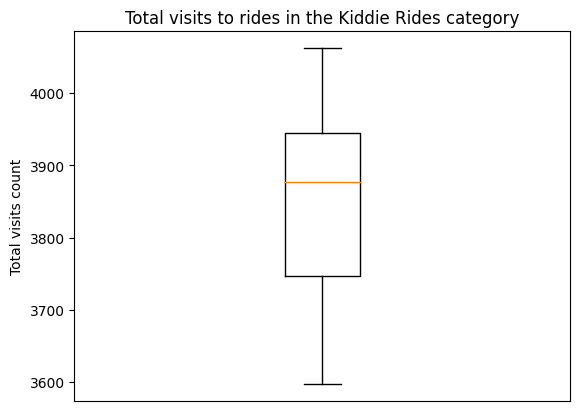

In [68]:
# Chart 4: A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides.
import sqlite3
import datetime
import pandas as pd
import matplotlib.pyplot as plt


# Connect to the database
database_name = 'dinofunworld.db'
conn = sqlite3.connect(database_name)

rides = pd.read_sql("SELECT attraction.name as Name, count(*) as sumVisits FROM checkin INNER JOIN attraction on attraction.AttractionID = checkin.attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%kiddie rides%' GROUP BY attraction.name",conn)

plt.boxplot(rides['sumVisits'].tolist())
plt.title("Total visits to rides in the Kiddie Rides category")
plt.ylabel("Total visits count")
plt.xticks([])
plt.show()
#print(sorted(rides['sumVisits'].tolist()))

